In [1]:
# importações necessarias
 
# fundamentais
import pandas as pd                                                   # manipulação de dados
import seaborn as sns                                                 # visualização grafica

# preprocessing
from sklearn.preprocessing import LabelEncoder                        # processamento de variaveis
from sklearn.preprocessing import StandardScaler                      # tratamento dos dados
from sklearn.model_selection import train_test_split                  # divisao treino/teste dados
from sklearn.decomposition import PCA                                 # redução de dimensionalidade
from sklearn.decomposition import KernelPCA                           # redução de dimensionalidade
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # redução de dimensionalidade

# algoritmos
from sklearn.ensemble import RandomForestClassifier                   # algoritmo RandomForest

# metricas
from sklearn.metrics import accuracy_score                            # avaliação do modelo
from sklearn.metrics import confusion_matrix                          # avalicação do modelo
from sklearn.metrics import classification_report                     # report modelo

In [2]:
# importação e visualização da base de dados

base_census = pd.read_csv('./data/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# separação variaveis preditoras e as classes

X_census = base_census.iloc[:, 0:14].values
y_census = base_census.iloc[:, 14].values
X_census.shape, y_census.shape

((32561, 14), (32561,))

In [4]:
# tratamento nas variaveis categoricas com o LabelEncoder

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[ :, 1] = label_encoder_workclass.fit_transform(X_census[ :, 1])
X_census[ :, 3] = label_encoder_education.fit_transform(X_census[ :, 3])
X_census[ :, 5] = label_encoder_marital.fit_transform(X_census[ :, 5])
X_census[ :, 6] = label_encoder_occupation.fit_transform(X_census[ :, 6])
X_census[ :, 7] = label_encoder_relationship.fit_transform(X_census[ :, 7])
X_census[ :, 8] = label_encoder_race.fit_transform(X_census[ :, 8])
X_census[ :, 9] = label_encoder_sex.fit_transform(X_census[ :, 9])
X_census[ :, 13] = label_encoder_country.fit_transform(X_census[ :, 13])

In [5]:
# visualização após tratamento

X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [6]:
# padronixação StandardScaled

sc = StandardScaler()
X_census_scaled = sc.fit_transform(X_census)

In [7]:
# divisão hold-out treino e teste

X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.2)
X_census_treinamento.shape, X_census_teste.shape

((26048, 14), (6513, 14))

#### PCA (principal component analysis)

In [ ]:
# redução de dimencionalidade

In [ ]:
# parametros PCA

pca = PCA(n_components=6)

In [ ]:
# treinamento PCA

X_census_treinamento_pca = pca.fit_transform(X_census_treinamento)
X_census_teste_pca = pca.transform(X_census_teste)

In [ ]:
# tamanho após tratamento com PCA

X_census_treinamento_pca.shape, X_census_teste_pca.shape

In [ ]:
X_census_treinamento_pca

In [ ]:
# variancia dos atributos após transfomação PCA

pca.explained_variance_ratio_

In [ ]:
# representatividade das variaveis

pca.explained_variance_ratio_.sum()

In [ ]:
# uso de algoritmo de classificação
# randomForest

# definindo paramtros
random_forest_pca = RandomForestClassifier(n_estimators=40,
                                           criterion='entropy',
                                           min_samples_split=5,
                                           min_samples_leaf=1,
                                           random_state=0)

# treino
random_forest_pca.fit(X_census_treinamento_pca, y_census_treinamento)

In [ ]:
# previsões

previsoes = random_forest_pca.predict(X_census_teste_pca)

#### Avaliação completa do modelo

In [ ]:
# avaliação completa model

previsoes = random_forest_pca.predict(X_census_teste_pca)

# accuracy
print(f'Acurácia geral do modelo : {accuracy_score(y_census_teste, previsoes)*100:.2f}%')

# matriz de confusão
cnn = confusion_matrix(y_census_teste, previsoes)
print(cnn)

# heatmap com matriz de confusão
sns.heatmap(cnn, annot=True);
print(classification_report(y_census_teste, previsoes))

#### Kernel PCA 

In [8]:
# configuração Kernel PCA
# kernel 'rbf' é comum em problemas não linearmente separaveis

kpca = KernelPCA(n_components=8, kernel='rbf')

X_census_treinamento_kpca = kpca.fit_transform(X_census_treinamento)
X_census_teste_kpca = kpca.transform(X_census_teste)

In [9]:
# tamanho após treinamento

X_census_treinamento_kpca.shape, X_census_teste_kpca.shape

((26048, 8), (6513, 8))

In [10]:
# visualização após tratamento

X_census_treinamento_kpca

array([[-1.01968460e-04, -9.28377882e-05, -9.03699487e-05, ...,
        -4.47503347e-05, -4.20896323e-08, -2.68899385e-10],
       [-1.02328529e-04, -9.32858697e-05, -9.08136110e-05, ...,
        -4.49920501e-05, -4.23172510e-08, -2.70353582e-10],
       [-1.01968458e-04, -9.28377864e-05, -9.03699469e-05, ...,
        -4.47503337e-05, -4.20896314e-08, -2.68899380e-10],
       ...,
       [-1.01968458e-04, -9.28377864e-05, -9.03699469e-05, ...,
        -4.47503337e-05, -4.20896314e-08, -2.68899379e-10],
       [-1.01968458e-04, -9.28377864e-05, -9.03699469e-05, ...,
        -4.47503337e-05, -4.20896314e-08, -2.68899380e-10],
       [-1.01968568e-04, -9.28379189e-05, -9.03700779e-05, ...,
        -4.47504044e-05, -4.20896979e-08, -2.68899804e-10]])

In [11]:
# uso de algoritmo de classificação
# randomForest

# definindo paramtros
random_forest_kpca = RandomForestClassifier(n_estimators=100,
                                           criterion='entropy',
                                           random_state=0)

# treino
random_forest_kpca.fit(X_census_treinamento_kpca, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

#### Avaliação completa do modelo

Acurácia geral do modelo : 75.16%
[[4895    4]
 [1614    0]]
              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86      4899
        >50K       0.00      0.00      0.00      1614

    accuracy                           0.75      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.75      0.65      6513



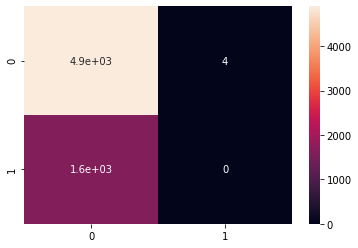

In [12]:
# avaliação completa model

previsoes = random_forest_kpca.predict(X_census_teste_kpca)

# accuracy
print(f'Acurácia geral do modelo : {accuracy_score(y_census_teste, previsoes)*100:.2f}%')

# matriz de confusão
cnn = confusion_matrix(y_census_teste, previsoes)
print(cnn)

# heatmap com matriz de confusão
sns.heatmap(cnn, annot=True);
print(classification_report(y_census_teste, previsoes))

#### LDA (Linear discriminant analysis)

In [17]:
# trasnformação
lda = LinearDiscriminantAnalysis()

X_census_treinamento_lda = lda.fit_transform(X_census_treinamento, y_census_treinamento) # algoritmo precisa das classes 
X_census_teste_lda = lda.transform(X_census_teste)

In [18]:
# tamanho da base de dados após tranformação

X_census_treinamento_lda.shape, X_census_teste_lda.shape

((26048, 1), (6513, 1))

In [19]:
# uso de algoritmo de classificação
# randomForest

# definindo paramtros
random_forest_lda = RandomForestClassifier(n_estimators=100,
                                           criterion='entropy',
                                           random_state=0)

# treino
random_forest_lda.fit(X_census_treinamento_lda, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

#### Avaliação completa do modelo

Acurácia geral do modelo : 73.85%
[[4058  841]
 [ 862  752]]
              precision    recall  f1-score   support

       <=50K       0.82      0.83      0.83      4899
        >50K       0.47      0.47      0.47      1614

    accuracy                           0.74      6513
   macro avg       0.65      0.65      0.65      6513
weighted avg       0.74      0.74      0.74      6513



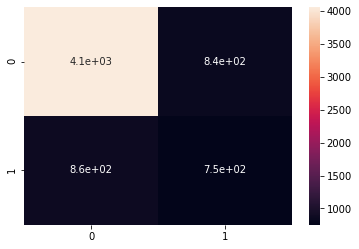

In [21]:
# avaliação completa model

previsoes = random_forest_lda.predict(X_census_teste_lda)

# accuracy
print(f'Acurácia geral do modelo : {accuracy_score(y_census_teste, previsoes)*100:.2f}%')

# matriz de confusão
cnn = confusion_matrix(y_census_teste, previsoes)
print(cnn)

# heatmap com matriz de confusão
sns.heatmap(cnn, annot=True);
print(classification_report(y_census_teste, previsoes))